# Machine Learning


## Table of Contents
* [Load Modules](#loadmodules)
* [Load Data](#loaddata)
* [Descriptive Modeling](#descriptive)
 * [Feature Selection](#featureselection)
   * [Combining VIF and Correlation Between Features](#correlation)
 * [Linear Regression](#linearregression)
 * [Decision Tree](#tree)

<hr>

### Load Modules<a class="anchor" id="loadmodules"></a>

In [1]:
import pandas as pd

import operator

import itertools

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz 
from sklearn import tree

from statsmodels.stats.outliers_influence import variance_inflation_factor

import cv2

%matplotlib inline
mpl.rcParams['font.size'] = 16.0
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

<hr>

### Load Data<a class="anchor" id="loaddata"></a>

In [2]:
df = pd.read_csv('../Khamanna/merged_df2.csv')
df.drop(columns='Unnamed: 0', inplace=True)

<hr>

### Descriptive Modeling<a class="anchor" id="descriptive"></a>

<hr>

### Feature Selection<a class="anchor" id="featureselection"></a>

### Combining VIF and Correlation Between Features<a class="anchor" id="correlation"></a>

In [3]:
# Select features to evaluate
columns_list = [
# 'county',
# 'County percent_rejected',

# 'Ballot Received After Deadline(%)',
# 'Certificate Missing(%)',
# 'Certificate Not Signed(%)',
# 'Grouped together(%)',
# 'Other Reasons(%)',
# 'Signature Does Not Match(%)',

# 'County ballots_cast',
# 'County ballots_rejected',

 'County Percent Hispanic or Latino',
 'County Percent White',
 'County Percent Black or African American',
 'County Percent American Indian and Alaska Native',
 'County Percent Asian',
 'County Percent Native Hawaiian and Other Pacific Islander',
 'County Percent Other Race',
 'County Percent Two or more races',

 'County percent_english',
 'County percent_spanish',
 'County percent_other',
 'County percent_english_very_well',
 'County percent_english_not_very_well',

 'County median_earnings',

 'County HS_and_less',
 'County more_than_HS',
 'County %HS_and_less',
 'County more_than_HS%'
]

In [4]:
# Try every possible combination of the features, and calculate the score for the 
# ones with VIF<5 and Correlation betwen features <= 0.9

y=df['County percent_rejected'] # target variable
linear_reg = LinearRegression() # regression model

output = {}
for i in range(2,len(columns_list)+1):
    for columns in itertools.combinations(columns_list, i):
        corr_table = df[list(columns)].corr()
        if ((abs(corr_table)>0.9).sum()>1).sum() == 0:
            test = [variance_inflation_factor(df[list(columns)].values, i) for i in range(df[list(columns)].shape[1])]
            if len([element for element in test if element>5])==0:
                X=df[list(columns)] # features
                linear_reg.fit(X,y)
                score = linear_reg.score(X,y)
                if (score>0.5):
                    output[columns]=score        

In [5]:
# Best Score and the features used
max(output.items(), key=operator.itemgetter(1))

(('County Percent Black or African American',
  'County Percent American Indian and Alaska Native',
  'County Percent Asian',
  'County Percent Native Hawaiian and Other Pacific Islander',
  'County Percent Other Race',
  'County Percent Two or more races',
  'County percent_spanish'),
 0.620247064666978)

In [6]:
# Best set of features to use in the Linear Regression model
columns_list=['County Percent Black or African American', 'County Percent American Indian and Alaska Native',
              'County Percent Asian', 'County Percent Native Hawaiian and Other Pacific Islander',
              'County Percent Other Race', 'County Percent Two or more races', 'County percent_spanish']

<hr>

### Linear Regression<a class="anchor" id="linearregression"></a>

In [7]:
# data to train model
X=df[columns_list]
y=df['County percent_rejected']

In [8]:
# Linear Regression Model
linear_reg = LinearRegression().fit(X, y)

print('score: ',linear_reg.score(X, y))
print('intercept = ', linear_reg.intercept_)


score:  0.620247064666978
intercept =  0.17210864640549206


In [9]:
coef_df=pd.DataFrame()
coef_df['variables']=df[list(set(columns_list)-set(['County percent_rejected']))].columns
coef_df['coefficient'] = linear_reg.coef_
coef_df

,variables,coefficient
0,County percent_spanish,-0.039113
1,County Percent American Indian and Alaska Native,0.217918
2,County Percent Asian,-0.011168
3,County Percent Two or more races,1.981768
4,County Percent Other Race,0.667313
5,County Percent Black or African American,0.286218
6,County Percent Native Hawaiian and Other Pacif...,0.046759


<hr>

### Decision Tree<a class="anchor" id="tree"></a>

In [10]:
# Decision Tree regressor 
regressor = DecisionTreeRegressor(random_state = 0) 

# fit the regressor with X and Y data 
regressor.fit(X, y) 

DecisionTreeRegressor(random_state=0)

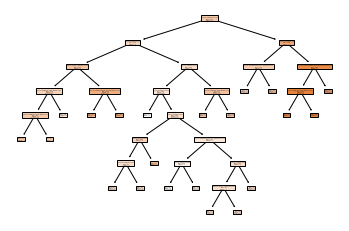

In [11]:
# plt.figure(figsize=(20,20))
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(regressor, feature_names=X.columns, filled=True)
plt.show()

In [12]:
# Using graphviz to display Decision Tree
# export the decision tree to a tree.dot file
export_graphviz(regressor, out_file ='tree.dot', feature_names=X.columns)

In [13]:
! dot -Tpng tree.dot -o tree.png

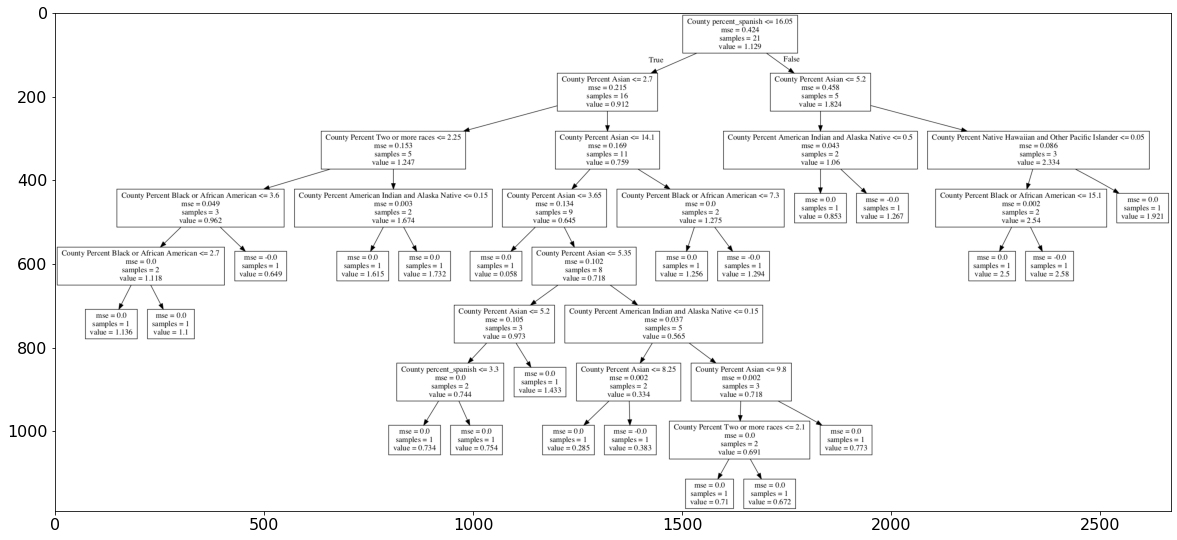

In [14]:
# Dispay Decision Tree
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)